In [63]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
#dataset to python environment
data = pd.read_csv('/content/titanic_dataset_644119c87dfed1e798680a4db6c607a7.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.shape

(891, 12)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#dropping
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [24]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data=data.fillna({"Cabin":'X'})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


Text(0.5, 1.0, 'Box plot of Pclass')

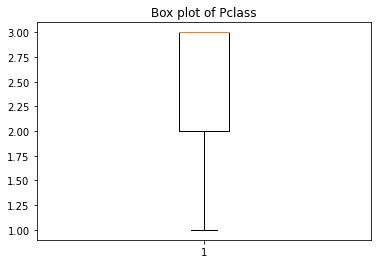

In [66]:
#checking and handling outliers
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Age')

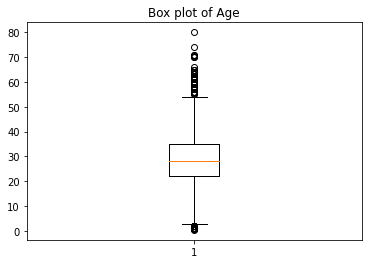

In [27]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [28]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print(low_lim,up_lim)

outlier =[] 
for x in data['Age']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

2.5 54.5
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [29]:
ind1 = data['Age']<low_lim
data.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [30]:
ind2 = data['Age']>up_lim
data.loc[ind2].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [31]:
data.drop([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831, 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

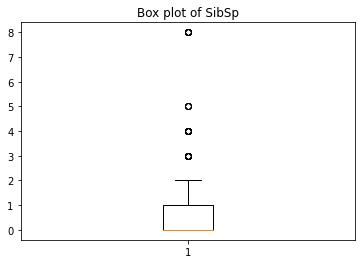

In [37]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [38]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [39]:
ind1 = data['SibSp']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [40]:
ind2 = data['SibSp']>up_lim
data.loc[ind2].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [41]:
data.drop([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863], inplace=True)


In [42]:
data.shape

(786, 9)

In [43]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
Y=data.Survived
X=data
X.drop(['Survived'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [56]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,...,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.318066,29.114504,0.311705,0.296438,30.295599,0.349873,0.650127,0.001272,0.001272,0.001272,...,0.002545,0.002545,0.003817,0.001272,0.001272,0.003817,0.001272,0.193384,0.089059,0.716285
std,0.828231,9.814762,0.527743,0.757073,48.962228,0.477233,0.477233,0.035669,0.035669,0.035669,...,0.050411,0.050411,0.061701,0.035669,0.035669,0.061701,0.035669,0.395203,0.285010,0.451087
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.125000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,1.000000,0.000000,27.750000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)
classifier.class_prior_

array([0.60545455, 0.39454545])

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Y_pred=classifier.predict(X_test)
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred,average='macro'))
print('Recall is',recall_score(Y_test,Y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,Y_pred,average='macro'))

Accuracy is 0.3771186440677966
Precision is 0.38831168831168833
Recall is 0.49018264840182646
F1 score is 0.2842730704957604


In [61]:
#Bernoulli Naive Bayes on training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [62]:
accuracy_score(Y_test,Y_pred)

0.7966101694915254

After Hypertuning the accuracy increased.